In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.tri as mtri
# from matplotlib.mlab import griddata
import scipy.interpolate
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import csv
import pandas as pd

In [2]:
%matplotlib notebook

In [3]:
HibridoData_df = pd.read_csv('HibridoData.csv')
HibridoData_df

,ROI,Eco99,IR,FI
0,15.217485,3374153.25,0.000713,1.064044
1,5.950660,5342143.76,0.000716,1.007335
2,6.997868,3945144.83,0.000721,1.080963
3,7.339509,4652473.01,0.000713,1.014520
4,8.007656,3515046.15,0.000721,1.034142
5,8.498025,3614812.28,0.000721,1.010922
6,8.301740,5386016.24,0.000713,1.003509
7,10.460416,3375598.81,0.000721,1.014870
8,10.333459,4291425.04,0.000713,0.994443
9,10.368014,3377016.02,0.000713,0.972375


In [4]:
ROI_Hibrido = HibridoData_df['ROI'].to_numpy()
Eco99_Hibrido = HibridoData_df['Eco99'].to_numpy()
IR_Hibrido = HibridoData_df['IR'].to_numpy()
FI_Hibrido = HibridoData_df['FI'].to_numpy()

In [12]:
N_Hibrido=1000

xi_Hibrido = np.linspace(ROI_Hibrido.min(), ROI_Hibrido.max(), N_Hibrido)
yi_Hibrido = np.linspace(Eco99_Hibrido.min(), Eco99_Hibrido.max(), N_Hibrido)
zi_Hibrido = scipy.interpolate.griddata((ROI_Hibrido, Eco99_Hibrido), FI_Hibrido, (xi_Hibrido[None,:], yi_Hibrido[:,None]), method='cubic')

xi_Hibrido,yi_Hibrido=np.meshgrid(xi_Hibrido,yi_Hibrido)

# 2
# triang = mtri.Triangulation(ROI_Hibrido, Eco99_Hibrido)

# isBad = np.where((ROI_Hibrido<ROI_Hibrido.min()) | (ROI_Hibrido>ROI_Hibrido.max()) | (Eco99_Hibrido<Eco99_Hibrido.min()) | (Eco99_Hibrido>Eco99_Hibrido.max()), True, False)

# mask = np.any(isBad[triang.triangles],axis=1)
# triang.set_mask(mask)

<IPython.core.display.Javascript object>


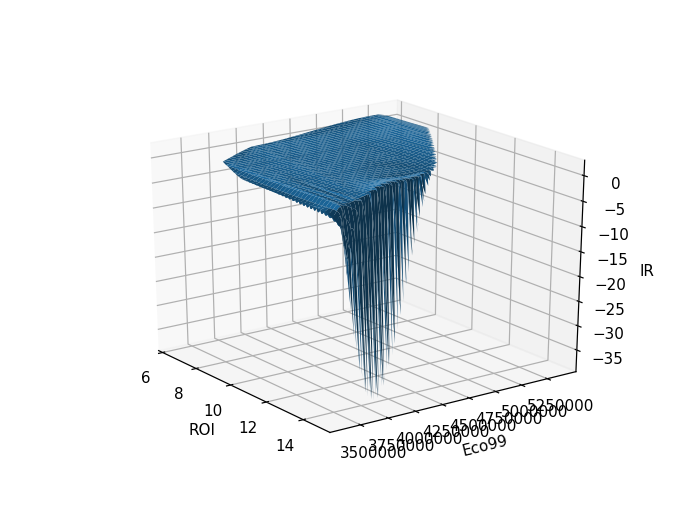

/home/emh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  after removing the cwd from sys.path.


In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_wireframe(xi, yi, zi, color='b')
ax.plot_surface(xi_Hibrido, yi_Hibrido, zi_Hibrido)
ax.set_xlabel("ROI")
ax.set_ylabel("Eco99")
ax.set_zlabel('IR')
plt.savefig('Fig1.pdf')
plt.show()

# # 2
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1, projection='3d')

# ax.plot_trisurf(triang, FI_Hibrido, cmap='jet')
# ax.scatter(ROI_Hibrido,Eco99_Hibrido,FI_Hibrido, marker='.', s=10, c="black", alpha=0.5)
# ax.view_init(elev=60, azim=-45)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()

In [7]:
SiemensData_df = pd.read_csv('SiemensData.csv')
SiemensData_df

,ROI,Eco99,IR,FI
0,35.171232,537975.844,0.000187,0.155573
1,11.134400,540495.736,0.000187,0.223302
2,11.940549,539294.034,0.000187,0.214994
3,11.576926,539801.801,0.000187,0.225146
4,15.482479,538706.585,0.000187,0.227782
5,15.025540,539586.729,0.000187,0.208392
6,14.503041,539151.458,0.000187,0.226622
7,20.319465,538395.593,0.000187,0.174268
8,20.148262,539310.228,0.000187,0.174268
9,20.068765,538852.647,0.000187,0.217330


In [8]:
ROI_Siemens = SiemensData_df['ROI'].to_numpy()
Eco99_Siemens = SiemensData_df['Eco99'].to_numpy()
IR_Siemens = SiemensData_df['IR'].to_numpy()
FI_Siemens = SiemensData_df['FI'].to_numpy()

In [9]:
N_Siemens=1000

xi_Siemens = np.linspace(ROI_Siemens.min(), ROI_Siemens.max(), N_Siemens)
yi_Siemens = np.linspace(Eco99_Siemens.min(), Eco99_Siemens.max(), N_Siemens)
zi_Siemens = scipy.interpolate.griddata((ROI_Siemens, Eco99_Siemens), IR_Siemens, (xi_Siemens[None,:], yi_Siemens[:,None]), method='cubic')

xi_Siemens,yi_Siemens=np.meshgrid(xi_Siemens,yi_Siemens)


# 2
# triang = mtri.Triangulation(ROI_Siemens, Eco99_Siemens)

# isBad = np.where((ROI_Siemens<ROI_Siemens.min()) | (ROI_Siemens>ROI_Siemens.max()) | (Eco99_Siemens<Eco99_Siemens.min()) | (Eco99_Siemens>Eco99_Siemens.max()), True, False)

# mask = np.any(isBad[triang.triangles],axis=1)
# triang.set_mask(mask)


<IPython.core.display.Javascript object>


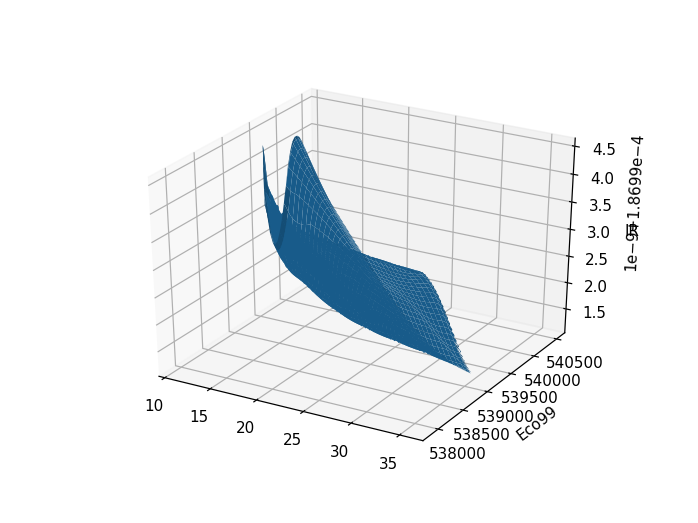

/home/emh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  after removing the cwd from sys.path.


In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_wireframe(xi, yi, zi, color='b')
ax.plot_surface(xi_Siemens, yi_Siemens, zi_Siemens)
ax.set_ylabel("Eco99")
ax.set_zlabel('IR')
plt.savefig('Fig2.pdf')
plt.show()


# 2
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1, projection='3d')

# ax.plot_trisurf(triang, FI_Siemens, cmap='jet')
# ax.scatter(ROI_Siemens,Eco99_Siemens,FI_Siemens, marker='.', s=10, c="black", alpha=0.5)
# ax.view_init(elev=60, azim=-45)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()
